In [1]:
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

Load data clean

In [2]:
x_train, x_test, y_train, y_test = joblib.load("data_clean.pkl")

# Train Model

### Decision Tree

In [3]:
dt_model = DecisionTreeClassifier(random_state=42, max_depth=4)
dt_model.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Logistic Regression

In [4]:
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### Random Forest

In [5]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [6]:
# Tampung model
models = {
    "Decision Tree" : dt_model,
    "Logistic Regression" : lr_model,
    "Random Forest" : rf_model
}

# Score & Report

In [7]:
# Tampilkan score & report untuk setiap model
for name, model in models.items():
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    class_repo = classification_report(y_test, y_pred)

    print(f"=== {name} ===")
    print(f"Accuracy Score = {accuracy:.2f}")
    print(f"Classification Report = {class_repo}")
    print("="*40)

=== Decision Tree ===
Accuracy Score = 0.80
Classification Report =               precision    recall  f1-score   support

           0       0.82      0.88      0.85       100
           1       0.74      0.65      0.69        54

    accuracy                           0.80       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.80      0.80      0.80       154

=== Logistic Regression ===
Accuracy Score = 0.71
Classification Report =               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154

=== Random Forest ===
Accuracy Score = 0.76
Classification Report =               precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68    

# Confusion Matrix

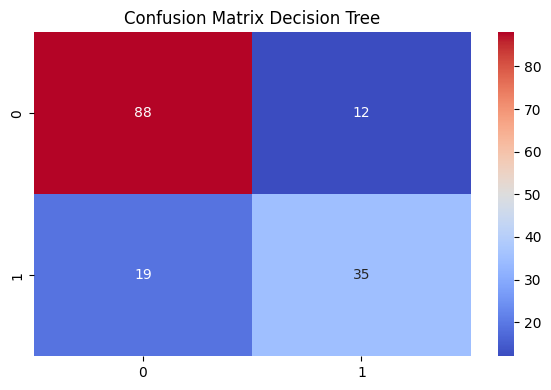

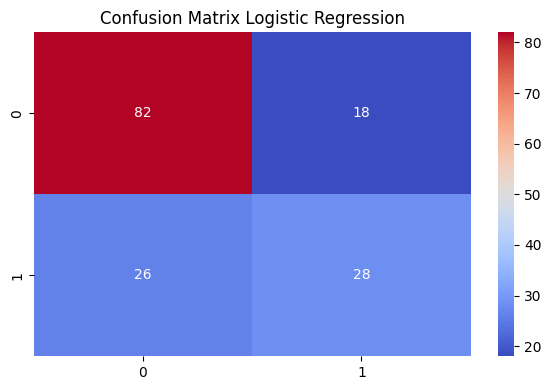

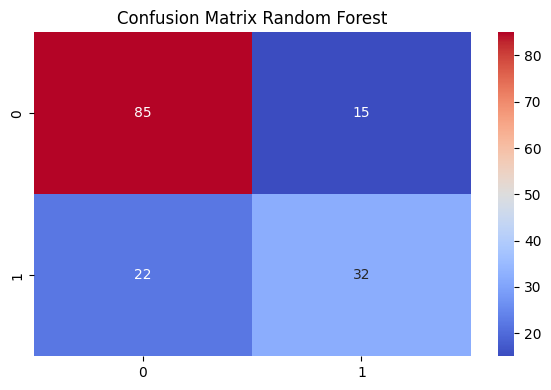

In [8]:
for name, model in models.items():
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6,4))
    plt.title(f"Confusion Matrix {name}")
    sns.heatmap(cm, annot=True, cmap="coolwarm")
    plt.tight_layout()
    plt.show()

# ROC-AUC Score

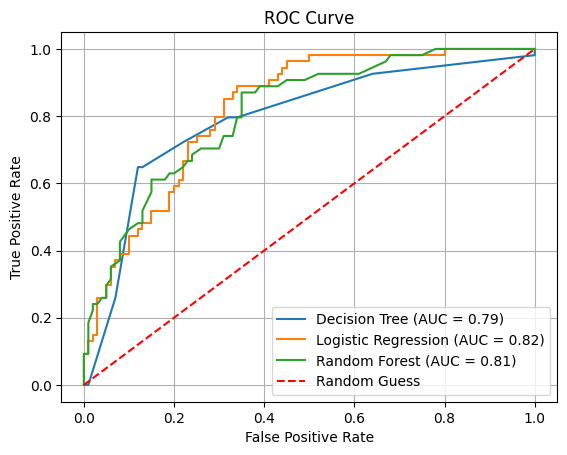

In [9]:
for name, model in models.items():
    y_prob = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess') # Garis Diagonal
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

### Simpan Model

In [10]:
for name, model in models.items():
    filename = f"{name}.pkl"
    joblib.dump(model, filename)